# Проект: Прогнозирование оттока клиентов оператора связи «Ниединогоразрыва.ком»

## Описание проекта

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

### Описание услуг

Оператор предоставляет два основных типа услуг:

- <b>Стационарную телефонную связь.</b> Возможно подключение телефонного аппарата к нескольким линиям одновременно.
- <b>Интернет.</b> Подключение может быть двух типов: через телефонную линию (DSL, от англ. digital subscriber line, «цифровая абонентская линия») или оптоволоконный кабель (Fiber optic).

Также доступны такие услуги:

- <b>Интернет-безопасность:</b> антивирус (DeviceProtection) и блокировка небезопасных сайтов (OnlineSecurity);
- <b>Выделенная линия технической поддержки</b> (TechSupport);
- <b>Облачное хранилище файлов для резервного копирования данных</b> (OnlineBackup);
- <b>Стриминговое телевидение</b> (StreamingTV) и <b>каталог фильмов</b> (StreamingMovies).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

### Описание данных

Данные состоят из файлов, полученных из разных источников:
- contract_new.csv — информация о договоре;
- personal_new.csv — персональные данные клиента;
- internet_new.csv — информация об интернет-услугах;
- phone_new.csv — информация об услугах телефонии.

Во всех файлах столбец <b>customerID</b> содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020.

Целевая метрика - <b>ROC-AUC выше 0.85</b>

## Исследовательский анализ данных

Импортируем нужные библиотеки

In [1]:
!pip install phik

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import phik

Записываем данные в переменные

In [3]:
data_contract = pd.read_csv('/datasets/contract_new.csv', index_col='customerID')
data_personal = pd.read_csv('/datasets/personal_new.csv', index_col='customerID')
data_internet = pd.read_csv('/datasets/internet_new.csv', index_col='customerID')
data_phone = pd.read_csv('/datasets/phone_new.csv', index_col='customerID')

Проведём первичный осмотр данных и разберём их по отдельности, а затем объединим в одну таблицу и посмотрим на корреляции

### Данные о договоре

In [4]:
data_contract.info()
data_contract.head(20)

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BeginDate         7043 non-null   object 
 1   EndDate           7043 non-null   object 
 2   Type              7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(6)
memory usage: 440.2+ KB


,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,
7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5
9305-CDSKC,2019-03-01,No,Month-to-month,Yes,Electronic check,99.65,1150.96
1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,2058.21
6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,300.48
7892-POOKP,2017-07-01,No,Month-to-month,Yes,Electronic check,104.80,3573.68


Отметим следующее:
- Столбец TotalCharges имеет тип object, если в нём нет пропусков, то его нужно привести к числовому типу
- Столбец BeginDate нужно привести к типу datetime
- Столбец EndDate привести к типу datetime не получится - в нём указана либо дата окончания договора, либо 'No', если клиент не ушёл. Этот же столбец скорее всего будет являться нашим целевым признаком

Посмотрим на значения в TotalCharges

In [5]:
data_contract['TotalCharges'].value_counts()

           11
20.45       6
101.0       5
19.65       4
732.6       4
           ..
6461.86     1
891.75      1
803.76      1
2782.55     1
3352.2      1
Name: TotalCharges, Length: 6658, dtype: int64

Одиннадцать пробелов, нужно узнать, что за ними скрывается

In [6]:
data_contract.query('TotalCharges == " "')

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,
4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,
3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,
5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,
4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,
1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,
7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,
3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,
2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,
2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,


Это новые клиенты, которые только заключили контракты с компанией и ещё не успели принести ей прибыль. Запишем в TotalCharges значение из MonthlyCharges а затем приведём столбцы TotalCharges и BeginDate к нужному типу

In [7]:
data_contract.loc[data_contract.query('TotalCharges == " "').index, 'TotalCharges'] = \
data_contract.query('TotalCharges == " "')['MonthlyCharges']

data_contract['TotalCharges'] = data_contract['TotalCharges'].astype('float')
data_contract['BeginDate'] = pd.to_datetime(data_contract['BeginDate'], format='%Y-%m')

Теперь, когда эти проблемы решены, мы можем посмотреть на распределения

Сначала посмотрим на пришедших и ушедших клиентов

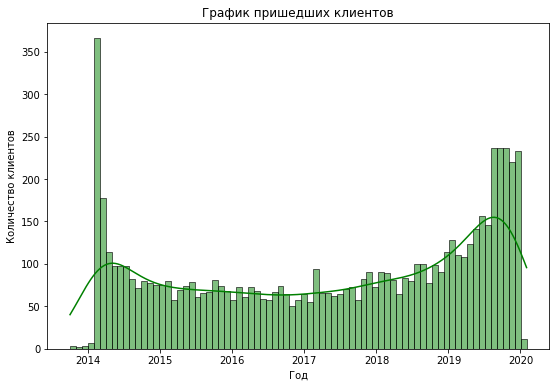

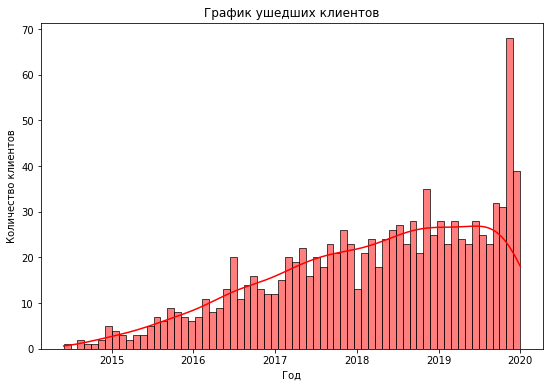

In [8]:
plt.figure(figsize=(9, 6))
sns.histplot(data_contract['BeginDate'], bins=77, color='green', kde=True);
plt.title('График пришедших клиентов')
plt.xlabel('Год')
plt.ylabel('Количество клиентов')
plt.show()

plt.figure(figsize=(9, 6))
sns.histplot(pd.to_datetime(data_contract.query('EndDate != "No"')['EndDate'], format='%Y-%m'), bins=66, color='red', kde=True);
plt.title('График ушедших клиентов')
plt.xlabel('Год')
plt.ylabel('Количество клиентов')
plt.show()

- в последнее время компания привлекает большое количество новых клиентов - хороший знак, постараемся помочь удержать их
- к сожалению уходит тоже всё больше - наша модель должна помочь как раз с этой проблемой

Далее посмотрим на прибыль от клиентов

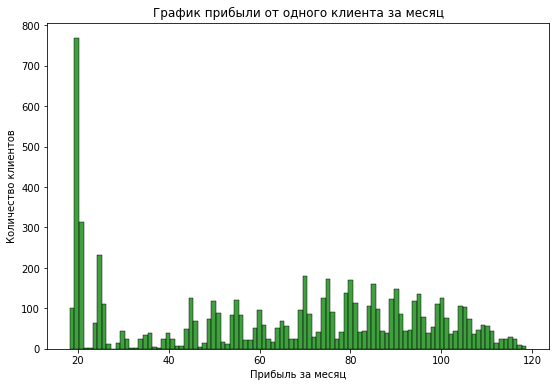

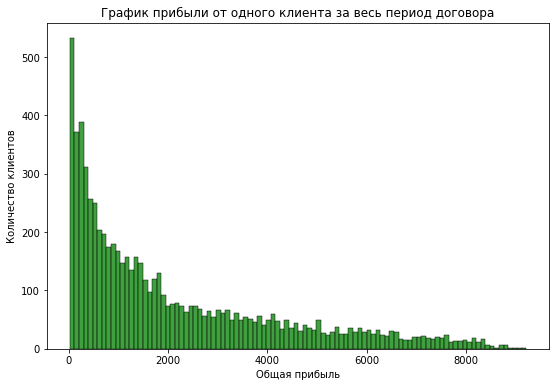

In [9]:
plt.figure(figsize=(9, 6))
sns.histplot(data_contract['MonthlyCharges'], bins=100, color='green');
plt.title('График прибыли от одного клиента за месяц')
plt.xlabel('Прибыль за месяц')
plt.ylabel('Количество клиентов')
plt.show()

plt.figure(figsize=(9, 6))
sns.histplot(data_contract['TotalCharges'], bins=100, color='green');
plt.title('График прибыли от одного клиента за весь период договора')
plt.xlabel('Общая прибыль')
plt.ylabel('Количество клиентов')
plt.show()

- на графике MonthlyCharges по значениям условно можем выделить три группы - от 20 до 40 (скорее всего те кто платят только за телефон и услугу параллельных звонков), от 40 до 70 (только интернет или интернет с телефоном без доп. услуг) и от 70 до максимума в 120 (клиенты с большим пакетом услуг)
- общая прибыль от клиента - накопительный признак, имеет нормальное для такого типа данных распределение

Теперь посмотрим на то, какие именно контракты компания заключает с клиентами

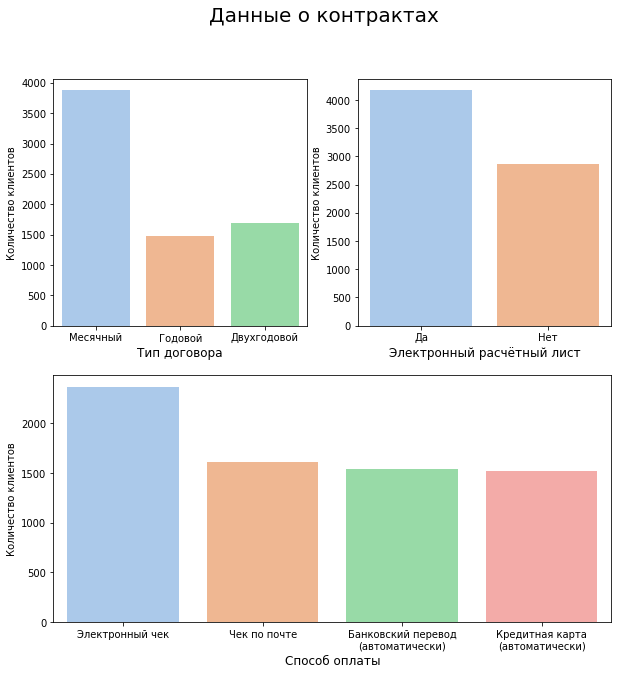

In [10]:
fig, axs = plt.subplot_mosaic([[0, 1], [2, 2]], figsize=(10, 10))
fig.suptitle('Данные о контрактах', fontsize=20)

sns.countplot(x=data_contract['Type'], ax=axs[0], palette='pastel').set_xticklabels(['Месячный', 'Годовой', 'Двухгодовой']);
axs[0].set_xlabel('Тип договора', fontsize=12)
axs[0].set_ylabel('Количество клиентов')


sns.countplot(x=data_contract['PaperlessBilling'], ax=axs[1], palette='pastel').set_xticklabels(['Да', 'Нет']);
axs[1].set_xlabel('Электронный расчётный лист', fontsize=12)
axs[1].set_ylabel('Количество клиентов')

sns.countplot(x=data_contract['PaymentMethod'], ax=axs[2],
              palette='pastel').set_xticklabels(['Электронный чек',
                                                 'Чек по почте',
                                                 'Банковский перевод\n(автоматически)',
                                                 'Кредитная карта\n(автоматически)']);
axs[2].set_xlabel('Способ оплаты', fontsize=12)
axs[2].set_ylabel('Количество клиентов')

plt.show()

Пока подписку на месяц оформляют больше, чем на год и два суммарно - это тоже можно использовать для удержания пользователей, например давать скидки при продлении услуг на длительный период. Остальные данные малоинформативны в отрыве от общей картины

<div class="alert alert-block alert-success"; style="border-left: 6px solid green">
<b>Успех ✔️</b>
       
Отличная работа с визуализацией!
    
</div>


### Персональные данные клиента

In [11]:
data_personal.info()
data_personal.head(20)

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         7043 non-null   object
 1   SeniorCitizen  7043 non-null   int64 
 2   Partner        7043 non-null   object
 3   Dependents     7043 non-null   object
dtypes: int64(1), object(3)
memory usage: 275.1+ KB


,gender,SeniorCitizen,Partner,Dependents
customerID,,,,
7590-VHVEG,Female,0,Yes,No
5575-GNVDE,Male,0,No,No
3668-QPYBK,Male,0,No,No
7795-CFOCW,Male,0,No,No
9237-HQITU,Female,0,No,No
9305-CDSKC,Female,0,No,No
1452-KIOVK,Male,0,No,Yes
6713-OKOMC,Female,0,No,No
7892-POOKP,Female,0,Yes,No


В этом датафрейме содрежится информация о семейном бэкграунде клиента. Они могут быть полезны, но сделать какие-то выводы по ним будет сложно. Какие-то признаки (например пол) могут оказаться неинформативны для модели, но утверждать это однозначно нельзя. Посмотрим на распределение этих данных

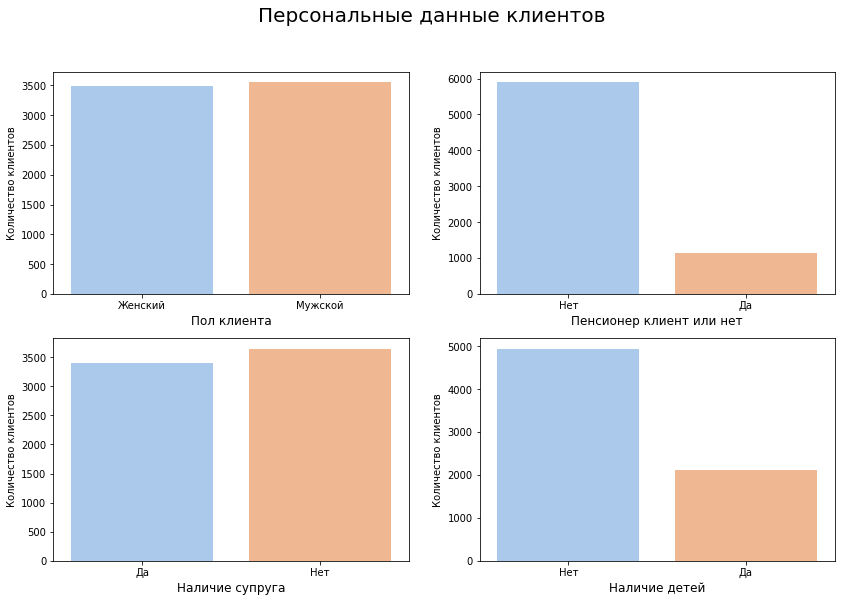

In [12]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 9))
fig.suptitle('Персональные данные клиентов', fontsize=20)

sns.countplot(x=data_personal['gender'], ax=axs[0, 0], palette='pastel').set_xticklabels(['Женский', 'Мужской']);
axs[0, 0].set_xlabel('Пол клиента', fontsize=12)
axs[0, 0].set_ylabel('Количество клиентов')

sns.countplot(x=data_personal['SeniorCitizen'], ax=axs[0, 1], palette='pastel').set_xticklabels(['Нет', 'Да']);
axs[0, 1].set_xlabel('Пенсионер клиент или нет', fontsize=12)
axs[0, 1].set_ylabel('Количество клиентов')

sns.countplot(x=data_personal['Partner'], ax=axs[1, 0], palette='pastel').set_xticklabels(['Да', 'Нет']);
axs[1, 0].set_xlabel('Наличие супруга', fontsize=12)
axs[1, 0].set_ylabel('Количество клиентов')

sns.countplot(x=data_personal['Dependents'], ax=axs[1, 1], palette='pastel').set_xticklabels(['Нет', 'Да']);
axs[1, 1].set_xlabel('Наличие детей', fontsize=12)
axs[1, 1].set_ylabel('Количество клиентов')

plt.show()

Ещё одним из способов удержания клиентской базы может быть объединение пользователей в группы-кластеры по общим признакам (например "пенсионеры" или "родители") и создание предложений для каждой из них - это может помочь и в том случае, если клиент соберётся уходить, и повысит общее довольство сервисом тех клиентов, чьи потребности будут учтены 

### Данные об интернет-услугах

In [13]:
data_internet.info()
data_internet.head(20)

<class 'pandas.core.frame.DataFrame'>
Index: 5517 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   InternetService   5517 non-null   object
 1   OnlineSecurity    5517 non-null   object
 2   OnlineBackup      5517 non-null   object
 3   DeviceProtection  5517 non-null   object
 4   TechSupport       5517 non-null   object
 5   StreamingTV       5517 non-null   object
 6   StreamingMovies   5517 non-null   object
dtypes: object(7)
memory usage: 344.8+ KB


,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
customerID,,,,,,,
7590-VHVEG,DSL,No,Yes,No,No,No,No
5575-GNVDE,DSL,Yes,No,Yes,No,No,No
3668-QPYBK,DSL,Yes,Yes,No,No,No,No
7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
9237-HQITU,Fiber optic,No,No,No,No,No,No
9305-CDSKC,Fiber optic,No,No,Yes,No,Yes,Yes
1452-KIOVK,Fiber optic,No,Yes,No,No,Yes,No
6713-OKOMC,DSL,Yes,No,No,No,No,No
7892-POOKP,Fiber optic,No,No,Yes,Yes,Yes,Yes


В этой таблице значений меньше, чем в предыдущих - если ID пользователя в ней нет, то услуга интернет-доступа ему не предоставляется, и при объединении с предыдущими датафреймами в объектах таких пользователей образуются пропуски. Удалять их нельзя - во-первых, выборка у нас и так небольшая, а во-вторых модель должна справляться даже с такимии пользователями. Неплохой идеей будет заполнить эти пропуски значением 'No' - если ввести 3 категорию, то она нам будет говорить тоже самое, что и 'No', а для модели это будет уже другая категория, что приведет к смещению
    
Посмотрим на основной признак - тип интернет подключения

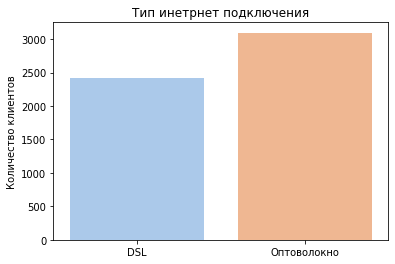

In [14]:
plt.figure(figsize=(6, 4))
sns.countplot(x=data_internet['InternetService'], palette='pastel').set_xticklabels(['DSL', 'Оптоволокно']);
plt.title('Тип инетрнет подключения')
plt.xlabel('')
plt.ylabel('Количество клиентов')
plt.show()

Похоже, оптоволокно начинает вытеснять с рынка DSL. Но помимо одного только интернета пользователям доступны и дополнительные услуги

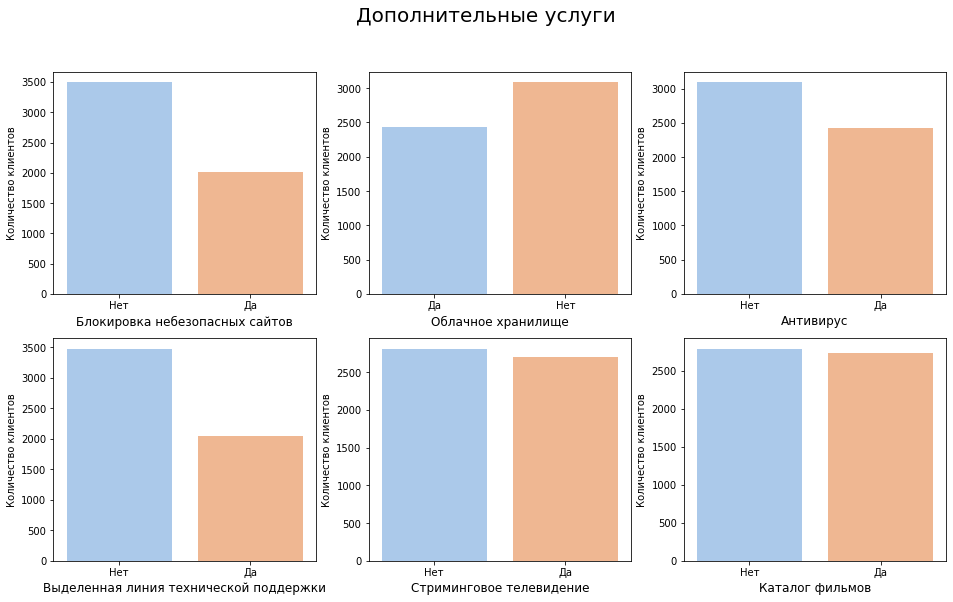

In [15]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(16, 9))
fig.suptitle('Дополнительные услуги', fontsize=20)

sns.countplot(x=data_internet['OnlineSecurity'], ax=axs[0, 0], palette='pastel').set_xticklabels(['Нет', 'Да']);
axs[0, 0].set_xlabel('Блокировка небезопасных сайтов', fontsize=12)
axs[0, 0].set_ylabel('Количество клиентов')

sns.countplot(x=data_internet['OnlineBackup'], ax=axs[0, 1], palette='pastel').set_xticklabels(['Да', 'Нет']);
axs[0, 1].set_xlabel('Облачное хранилище', fontsize=12)
axs[0, 1].set_ylabel('Количество клиентов')

sns.countplot(x=data_internet['DeviceProtection'], ax=axs[0, 2], palette='pastel').set_xticklabels(['Нет', 'Да']);
axs[0, 2].set_xlabel('Антивирус', fontsize=12)
axs[0, 2].set_ylabel('Количество клиентов')

sns.countplot(x=data_internet['TechSupport'], ax=axs[1, 0], palette='pastel').set_xticklabels(['Нет', 'Да']);
axs[1, 0].set_xlabel('Выделенная линия технической поддержки', fontsize=12)
axs[1, 0].set_ylabel('Количество клиентов')

sns.countplot(x=data_internet['StreamingTV'], ax=axs[1, 1], palette='pastel').set_xticklabels(['Нет', 'Да']);
axs[1, 1].set_xlabel('Стриминговое телевидение', fontsize=12)
axs[1, 1].set_ylabel('Количество клиентов')

sns.countplot(x=data_internet['StreamingMovies'], ax=axs[1, 2], palette='pastel').set_xticklabels(['Нет', 'Да']);
axs[1, 2].set_xlabel('Каталог фильмов', fontsize=12)
axs[1, 2].set_ylabel('Количество клиентов')

plt.show()

Дополнительными услугами пользуется от трети до половины всех клиентов, которые подключили интернет, вероятно, это говорит о их высоком качестве. Их тоже можно использовать в качестве предложения на небольшой срок для клиентов, которые собираются уходить. Это может не только оставить клиента с компанией, но и в последующем увеличить с него прибыль

### Данные об услугах телефонии

In [16]:
data_phone.info()
data_phone.head(20)

<class 'pandas.core.frame.DataFrame'>
Index: 6361 entries, 5575-GNVDE to 3186-AJIEK
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MultipleLines  6361 non-null   object
dtypes: object(1)
memory usage: 99.4+ KB


,MultipleLines
customerID,
5575-GNVDE,No
3668-QPYBK,No
9237-HQITU,No
9305-CDSKC,Yes
1452-KIOVK,Yes
7892-POOKP,Yes
6388-TABGU,No
9763-GRSKD,No
7469-LKBCI,No


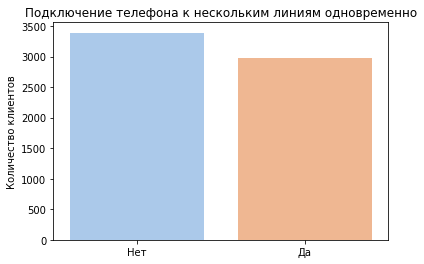

In [17]:
plt.figure(figsize=(6, 4))
sns.countplot(x=data_phone['MultipleLines'], palette='pastel').set_xticklabels(['Нет', 'Да']);
plt.title('Подключение телефона к нескольким линиям одновременно')
plt.xlabel('')
plt.ylabel('Количество клиентов')
plt.show()

В этой таблице тоже указаны не все пользователи, значит при объединении в ней окажется три варианта значений - 'Yes' для тех пользователей, у которых возможно подключение к нескольким линиям связи одновременно, 'No' для тех, у кого подключён только телефон без этой услуги и none если услуги телефонной связи не подключены. Заполнение пропусков значением 'No' опять же будет актуально для такого деления.

### Объединяем данные

Объединяем таблицы в один датафрейм

In [18]:
data = data_contract.join(data_personal).join(data_internet).join(data_phone)

data.info()
data.head(20)

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   BeginDate         7043 non-null   datetime64[ns]
 1   EndDate           7043 non-null   object        
 2   Type              7043 non-null   object        
 3   PaperlessBilling  7043 non-null   object        
 4   PaymentMethod     7043 non-null   object        
 5   MonthlyCharges    7043 non-null   float64       
 6   TotalCharges      7043 non-null   float64       
 7   gender            7043 non-null   object        
 8   SeniorCitizen     7043 non-null   int64         
 9   Partner           7043 non-null   object        
 10  Dependents        7043 non-null   object        
 11  InternetService   5517 non-null   object        
 12  OnlineSecurity    5517 non-null   object        
 13  OnlineBackup      5517 non-null   object        
 14  DeviceProtecti

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
customerID,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.60,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.50,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No
9305-CDSKC,2019-03-01,No,Month-to-month,Yes,Electronic check,99.65,1150.96,Female,0,No,No,Fiber optic,No,No,Yes,No,Yes,Yes,Yes
1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,2058.21,Male,0,No,Yes,Fiber optic,No,Yes,No,No,Yes,No,Yes
6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,300.48,Female,0,No,No,DSL,Yes,No,No,No,No,No,NaN
7892-POOKP,2017-07-01,No,Month-to-month,Yes,Electronic check,104.80,3573.68,Female,0,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Yes


Строим корреляционную карту

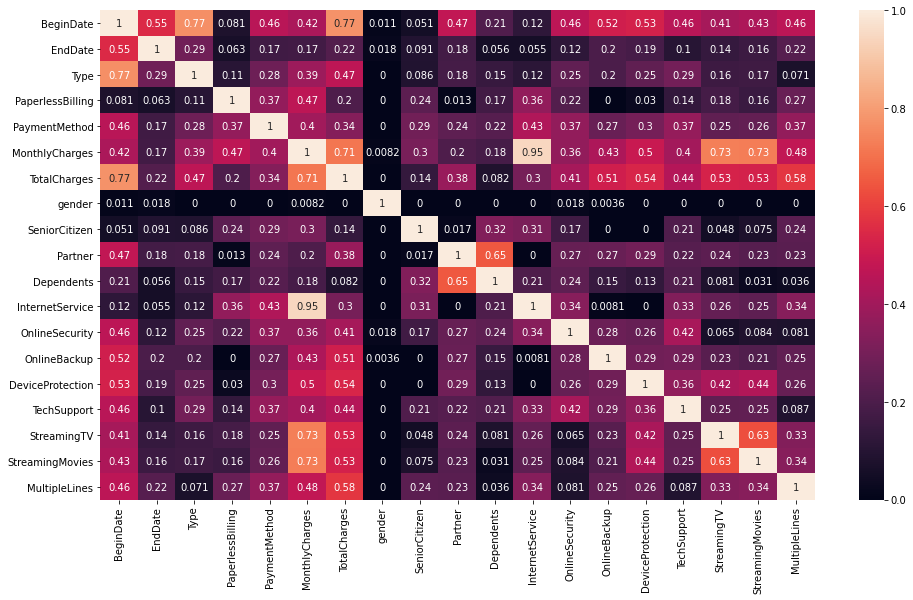

In [19]:
plt.figure(figsize=(16, 9))
sns.heatmap(data.phik_matrix(interval_cols=data.describe().columns), annot=True);
plt.show()

Необходимо учитывать, что в данных пока ещё есть пропуски, но какие-то выводы уже можно сделать. Высокая корреляция между признаками MonthlyCharges и InternetService, StreamingTV и StreamingMovies - скорее всего подключение по оптоволокну и услуги стримингового телевидения и онлайн-кинотеатра стоят больше прочих, так же MonthlyCharges коррелирует с TotalCharges - чем больше пользователь платит в месяц, тем больше общая прибыль от этого клиента. Так же видим чёрный крест на месте признака gender. В целом карта достаточно яркая, многие признаки могут показать связь при определённых условиях

### Цель проекта, план дальнейшей работы

<b>Цель проекта</b> - обучить модель, которая будет справляться с поставленной бизнесом задачей классификации выявления клиентов, которые близки к тому, чтобы уйти

<b>План работы:</b>
- заполнить пропуски, создать новый признак lifetime - срок в днях, который клиент остаётся (или оставался) с компанией
- создать целевой признак из колонки EndDate (0 - клиент не ушёл, 1 - клиент ушёл), удалить признаки BeginDate и EndDate
- разделить выборки на обучающую и тестовую выборки, преобразовать признаки в числовой вид
- обучить модели: DesicionTreeClassifier, CatBoostClassifier и LGBMClassifier; каждой модели подобрать гиперпараметры, которые дадут лучший результат по метрике
- выбрать самую точную модель и испытать её на тестовой выборке

## Подготовка данных

Заполняем все пропуски значением 'No'

In [20]:
data = data.fillna('No')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   BeginDate         7043 non-null   datetime64[ns]
 1   EndDate           7043 non-null   object        
 2   Type              7043 non-null   object        
 3   PaperlessBilling  7043 non-null   object        
 4   PaymentMethod     7043 non-null   object        
 5   MonthlyCharges    7043 non-null   float64       
 6   TotalCharges      7043 non-null   float64       
 7   gender            7043 non-null   object        
 8   SeniorCitizen     7043 non-null   int64         
 9   Partner           7043 non-null   object        
 10  Dependents        7043 non-null   object        
 11  InternetService   7043 non-null   object        
 12  OnlineSecurity    7043 non-null   object        
 13  OnlineBackup      7043 non-null   object        
 14  DeviceProtecti

Создаём целевой признак - столбец со значением '0' если клиент остаётся с компанией и '1' если он ушёл

In [21]:
target = np.where(data['EndDate'] == 'No', 0, 1)

Теперь мы можем изменить все значения 'No' в столбце 'EndDate' на актуальную дату - 1 февраля 2020 года, перевести этот столбец к типу datetime и создать новый признак lifetime, который будет отображать общее время сотрудничества клиента с компанией в днях

In [22]:
data['EndDate'] = np.where(data['EndDate'] == 'No', '2020-02-01', data['EndDate'])
data['EndDate'] = pd.to_datetime(data['EndDate'], format='%Y-%m')

data['lifetime'] = data['EndDate'] - data['BeginDate']
data['lifetime'] = data['lifetime'].dt.days

data

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,lifetime
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,No,31
5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No,1036
3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No,123
7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.60,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,No,1371
9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.50,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No,153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,2018-02-01,2020-02-01,One year,Yes,Mailed check,84.80,2035.20,Male,0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Yes,730
2234-XADUH,2014-02-01,2020-02-01,One year,Yes,Credit card (automatic),103.20,7430.40,Female,0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes,2191
4801-JZAZL,2019-03-01,2020-02-01,Month-to-month,Yes,Electronic check,29.60,325.60,Female,0,Yes,Yes,DSL,Yes,No,No,No,No,No,No,337


Удаляем столбец 'EndDate', чтобы не допустить утечки целевого признака и 'BeginDate', который логически не смысла - дата начала сотрудничества сторон не может предсказать, как будут развиваться их отношения

In [23]:
data = data.drop(['BeginDate', 'EndDate'], axis=1)

Теперь у нас есть отдельная переменная, где находятся все необходимые нам признаки и отдельная переменная, куда записан целевой признак

In [24]:
print(target)
data

[0 0 0 ... 0 0 0]


,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,lifetime
customerID,,,,,,,,,,,,,,,,,,
7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,No,31
5575-GNVDE,One year,No,Mailed check,56.95,2071.84,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No,1036
3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No,123
7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1960.60,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,No,1371
9237-HQITU,Month-to-month,Yes,Electronic check,70.70,353.50,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No,153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,One year,Yes,Mailed check,84.80,2035.20,Male,0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Yes,730
2234-XADUH,One year,Yes,Credit card (automatic),103.20,7430.40,Female,0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes,2191
4801-JZAZL,Month-to-month,Yes,Electronic check,29.60,325.60,Female,0,Yes,Yes,DSL,Yes,No,No,No,No,No,No,337


## Обучение моделей

Импортируем нужные библиотеки

In [25]:
!pip install shap

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import shap
from sklearn.metrics import confusion_matrix

Создаём переменную RANDOM_STATE

In [27]:
RANDOM_STATE = 140823

Меняем тип во всех столбцах с типом 'object' на тип 'category'

In [28]:
for obj in data.select_dtypes(include=['object']).columns.tolist():
    data[obj] = data[obj].astype('category')

Создаём список с категориальными признаками

In [29]:
cat_names = data.select_dtypes(include=['category']).columns.tolist()

In [30]:
X_train, X_test, y_train, y_test = \
train_test_split(data, target, test_size=0.25, random_state=RANDOM_STATE)

Делим данные на обучающую и контрольную выборки

Далее мы будем рассматривать разные модели (RandomForestClassifier и алгоритмы градиентного бустинга LightGBM и CatBoost) и настраивать их гиперпараметры так, чтобы получить максимальный результат по метрике ROC-AUC

### RandomForestClassifier

Создаём переменные, в которые записываем нашу модель RandomForestClassifier, OrdinalEncoder (чтобы трансформировать значения в категориальных признаках из буквенных в числовые) и ColumnTransformer (чтобы можно было вставить эту трансформацию в пайплайн)

После этого создаём пайплайн, в него загружаем OrdinalEncoder в трансформере и нашу модель

Определяем, какие параметры у модели будут подбираться

И наконец определяем GridSearchCV (который и будет подбирать наши параметры), указываем ему путь к пайплайну и параметрам, количество кросс-валидаций и метрики для оценки (по условию нам необходима ROC-AUC)

In [31]:
rfc = RandomForestClassifier(criterion='entropy', random_state=RANDOM_STATE)
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
transformer = ColumnTransformer(transformers=[('cat', encoder, cat_names)])

pipeline = Pipeline([('encoder', transformer), ('classifier', rfc)])

grid_params = {'classifier__n_estimators': [100, 160, 240],
               'classifier__max_depth': [6, 8],
               'classifier__min_samples_split': [2, 6, 10],
               'classifier__min_samples_leaf': [1, 3, 4]
              }

grid_rfc = GridSearchCV(pipeline, grid_params, cv=5, scoring=['roc_auc', 'accuracy'],
                        refit='roc_auc', return_train_score=True, verbose=3, n_jobs=-1)

Начинаем процесс подбора гиперпараметров для нашей модели

In [32]:
grid_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5] END classifier__max_depth=6, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; accuracy: (train=0.843, test=0.842) roc_auc: (train=0.783, test=0.702) total time=   0.3s
[CV 2/5] END classifier__max_depth=6, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; accuracy: (train=0.843, test=0.842) roc_auc: (train=0.787, test=0.689) total time=   0.3s
[CV 3/5] END classifier__max_depth=6, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; accuracy: (train=0.842, test=0.843) roc_auc: (train=0.781, test=0.734) total time=   0.3s
[CV 4/5] END classifier__max_depth=6, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; accuracy: (train=0.842, test=0.843) roc_auc: (train=0.786, test=0.698) total time=   0.3s
[CV 5/5] END classifier__max_depth=6, classifi

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encoder',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Type',
                                                                          'PaperlessBilling',
                                                                          'PaymentMethod',
                                                                          'gender',
                                                                          'Partner',
                                                                          'Dependents',
                                                                          'InternetService',
  

In [33]:
print('Лучшие параметры -', grid_rfc.best_params_, ', лучший результат -', grid_rfc.best_score_)

Лучшие параметры - {'classifier__max_depth': 6, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100} , лучший результат - 0.7119066307617606


Такой результат нас не устроит, перейдем к более продвинутым алгоритмам

### LGBMClassifier

Объявляем алгоритм LightGBM Classifier, его настраиваемые параметры и оборачиваем его в GridSearchCV

In [34]:
lgb = LGBMClassifier(random_state=RANDOM_STATE, n_jobs=-1)
param_grid = {'max_depth': [4, 5, 6],
              'learning_rate': [0.1, 0.15],
              'num_leaves': [31, 52, 64],
              'colsample_bytree': [0.8, 1],
              'n_estimators': [160, 240, 400]
             }
grid_lgb = GridSearchCV(lgb, param_grid, scoring=['roc_auc', 'accuracy'],
                   refit='roc_auc', return_train_score=True, cv=5, verbose=3, n_jobs=-1)

Подбираем параметры

In [35]:
grid_lgb.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=160, num_leaves=31; accuracy: (train=0.919, test=0.879) roc_auc: (train=0.957, test=0.894) total time=   0.8s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=160, num_leaves=31; accuracy: (train=0.922, test=0.866) roc_auc: (train=0.960, test=0.812) total time=   0.8s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=160, num_leaves=31; accuracy: (train=0.922, test=0.878) roc_auc: (train=0.959, test=0.863) total time=   0.7s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=160, num_leaves=31; accuracy: (train=0.924, test=0.868) roc_auc: (train=0.959, test=0.859) total time=   0.8s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=160, num_leaves=31; accuracy: (train=0.918, test=0.884) roc_auc: (train=0.957, test=0.890) total 

GridSearchCV(cv=5, estimator=LGBMClassifier(random_state=140823), n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1],
                         'learning_rate': [0.1, 0.15], 'max_depth': [4, 5, 6],
                         'n_estimators': [160, 240, 400],
                         'num_leaves': [31, 52, 64]},
             refit='roc_auc', return_train_score=True,
             scoring=['roc_auc', 'accuracy'], verbose=3)

In [36]:
print('Лучшие параметры -', grid_lgb.best_params_, ', лучший результат -', grid_lgb.best_score_)

Лучшие параметры - {'colsample_bytree': 0.8, 'learning_rate': 0.15, 'max_depth': 4, 'n_estimators': 400, 'num_leaves': 31} , лучший результат - 0.893156500049853


Хороший результат, мы достигли целевой метрики. Теперь посмотрим, как справится другой алгоритм градиентного бустинга - CatBoost

### CatBoostClassifier

CatBoost имеет встроенный метод подбора гиперпараметров, воспользуемся им

Определяем изначальные параметры для нашего алгоритма и категориальные параметры, затем перечисляем параметры, которые будем подбирать

In [37]:
cat = CatBoostClassifier(loss_function='CrossEntropy', eval_metric='AUC:hints=skip_train~false', iterations=3001,
                         cat_features=cat_names, random_state=RANDOM_STATE, verbose=1000, metric_period=1000)

parameters = {'depth': [4, 5, 6],
              'learning_rate': [0.1, 0.15],
              'l2_leaf_reg': [2, 3]
             }

Подбираем оптимальные

In [38]:
grid_cat = cat.grid_search(parameters, X_train, y_train, cv=5, partition_random_seed=RANDOM_STATE)

0:	learn: 0.6976493	test: 0.6737372	best: 0.6737372 (0)	total: 52.5ms	remaining: 2m 37s
1000:	learn: 0.9935779	test: 0.8997436	best: 0.8997436 (1000)	total: 4.1s	remaining: 8.2s
2000:	learn: 0.9999387	test: 0.9082938	best: 0.9082938 (2000)	total: 8.2s	remaining: 4.1s
3000:	learn: 1.0000000	test: 0.9085382	best: 0.9085382 (3000)	total: 12.3s	remaining: 0us

bestTest = 0.9085382184
bestIteration = 3000

0:	loss: 0.9085382	best: 0.9085382 (0)	total: 12.8s	remaining: 2m 20s
0:	learn: 0.6976493	test: 0.6737372	best: 0.6737372 (0)	total: 6.22ms	remaining: 18.7s
1000:	learn: 0.9992286	test: 0.9078921	best: 0.9078921 (1000)	total: 4.03s	remaining: 8.04s
2000:	learn: 1.0000000	test: 0.9091341	best: 0.9091341 (2000)	total: 8.12s	remaining: 4.06s
3000:	learn: 1.0000000	test: 0.9108013	best: 0.9108013 (3000)	total: 12.3s	remaining: 0us

bestTest = 0.9108013284
bestIteration = 3000

1:	loss: 0.9108013	best: 0.9108013 (1)	total: 25.1s	remaining: 2m 5s
0:	learn: 0.6975973	test: 0.6737372	best: 0.6737

In [39]:
print('Лучшие параметры -', cat.get_params(), ', лучший результат -', grid_cat['cv_results']['test-AUC-mean'][-1])

Лучшие параметры - {'iterations': 3001, 'loss_function': 'CrossEntropy', 'verbose': 1000, 'metric_period': 1000, 'eval_metric': 'AUC:hints=skip_train~false', 'random_state': 140823, 'cat_features': ['Type', 'PaperlessBilling', 'PaymentMethod', 'gender', 'Partner', 'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines'], 'depth': 4, 'l2_leaf_reg': 3, 'learning_rate': 0.1} , лучший результат - 0.9223727347021466


CatBoost показал ещё лучший результат, эту модель мы и будем использовать для определения клиентов, которые планируют уйти

### Результаты обучения

In [43]:
pd.DataFrame(data={'CatBoost': [grid_cat['cv_results']['test-AUC-mean'][-1]],
                   'LightGBM': [grid_lgb.best_score_],
                   'RandomForestRegressor': [grid_rfc.best_score_]},
             index=['Средняя точность предсказания лучшей модели, ROC-AUC'])

,CatBoost,LightGBM,RandomForestRegressor
"Средняя точность предсказания лучшей модели, ROC-AUC",0.922373,0.893157,0.711907


Обучение завершено, лучшая модель определена, переходим к её тестированию и анализу результатов

## Анализ лучшей модели

Получаем предсказания на тестовой выборке

Результат предсказания CatBoostClassifier на тестовой выборке 0.930561507718987


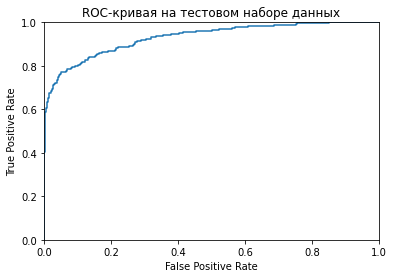

In [41]:
print('Результат предсказания CatBoostClassifier на тестовой выборке', roc_auc_score(y_test, cat.predict_proba(X_test)[:, 1]))

fpr, tpr, thresholds = roc_curve(y_test, cat.predict_proba(X_test)[:, 1])

plt.figure()

plt.plot(fpr, tpr)
plt.xlim(0,1)
plt.ylim(0,1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая на тестовом наборе данных')

plt.show()

Результат выше установленного бизнесом порога, цель проекта достигнута. Посмотрим на примере тестовых данных и обученной модели как именно признаки клиентов влияют на то, уйдут они или нет - чем ярче будет цвет на графике, тем информативнее эти клиенты стали для нашей модели.

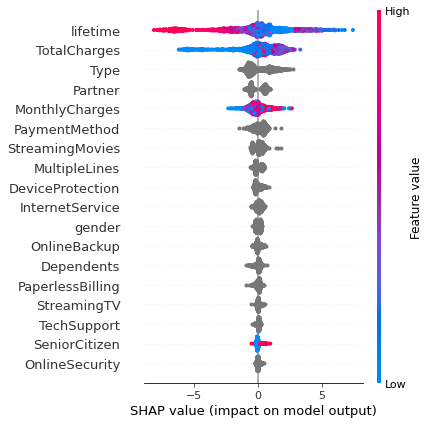

,Влияение на целевой признак
lifetime,44.791889
MonthlyCharges,14.054242
TotalCharges,12.199557
Type,7.174368
PaymentMethod,4.668265
Partner,2.440598
InternetService,2.077888
MultipleLines,1.644879
Dependents,1.512708
DeviceProtection,1.377947


In [42]:
shap_test = shap.TreeExplainer(cat).shap_values(X_test)
shap.summary_plot(shap_test, X_test, max_display=25, plot_size=(6, 6))
pd.DataFrame(cat.get_feature_importance(), index=X_test.columns,
             columns=['Влияение на целевой признак']).sort_values(by='Влияение на целевой признак', ascending=False)

Видим, что признак lifetime, который мы сделали из колонок BeginDate и EndDate, влияет на целевой признак больше всего, причём самыми информативными стали клиенты, которые присоединились недавно, среди тех, кто стал клиентом уже давно, доля повлиявших на предсказания невелика. Так же информативными стали клиенты, общая и месячная суммы трат которых находятся в средних значениях или выше. Пенсионеры скорее были информативны, чем нет. Хорошую корреляцию так же показали признаки с типом договора и способом оплаты, а так же наличие партнёра и тип интернет подключения (или его отсутствие), но для них не удалось выделить таких закономерностей, как для пердыдущих признаков.

Посмотрим на матрицу ошибок нашей модели

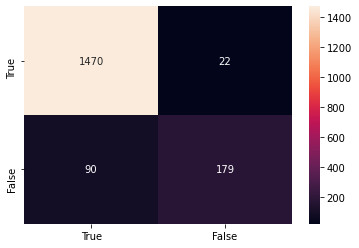

Правильно определённые клиенты - 1649 неправильно определённые клиенты - 112


In [57]:
matrix = confusion_matrix(y_test, cat.predict(X_test))
ax = sns.heatmap(matrix, annot=True, fmt='.0f')
ax.set_xticklabels(['True', 'False'])
ax.set_yticklabels(['True', 'False']);
plt.show()

print('Правильно определённые клиенты -', matrix[0][0] + matrix[1][1],
      'неправильно определённые клиенты -', matrix[0][1] + matrix[1][0])

Модель неправильно определила 112 клиентов, из них 22 - клиенты, которые ушли, но модель не смогла их опознать, и 90 - клиенты, которые не уходили, но модель предположила, что они хотят уйти - это показатель того, что модель скорее склонна будет выдавать промокоды и специальные условия тем, кто не хочет уйти, чем игнорировать тех, кто хочет - что подходит поставленной бизнесом задаче на удержание как можно большего числа клиентов

## Отчёт по решению

Нашей целью было обучить модель, которая будет выявлять клиентов, близких к тому, чтобы уйти, и мы её добились

Что мы сделали:
- заполнили пропуски и создали новый признак, содержащий срок, который клиент остаётся (или оставался) с компанией
- создали целевой признак и удалили ненужные признаки 
- разделили выборки на обучающую и тестовую выборки, преобразовали признаки и обучили три модели: DesicionTreeClassifier, CatBoostClassifier и LGBMClassifier; каждой модели постарались подобрать гиперпараметры, которые дали бы лучший результат по метрике

После этого мы испытали настроенный алгоритм CatBoost, который дал лучший результат, на тестовой выборке, и получили результат 0.93 по метрике ROC-AUC

В процессе выполнения проекта возникли следующие трудности:
- LightGBM не воспринимал категориальные признаки, т.к. они имели тип данных object - мы изменили тип данных всех таких признаков на category, и затем получили список всех категориальных признаков, который передавали моделям
- OrdinalEncoder не работал в пайплайне, мы обернули его в ColumnTransformer

Ключевыми этапами в решении задачи были:
- анализ поставленной перед нами бизнес-задачи
- анализ предоставленных в наше распоряжение данных
- определение и создание целевого признака
- подготовка данных, создание признаков, изменение типов данных
- обучение моделей
- анализ самой точной из моделей CatBoost и признаков, которые позволили добиться такой точности

Нашей итоговой моделью вышел CatBoostClassifier со значениями максимальной глубины 4, коэффициента при члене регуляризации L2 функции потерь 3, а так же функцией потерь 'CrossEntropy'. Его скорость обучения мы установили на 0.1, а количество итераций - 3000, каждую тысячу итераций модель выводит результаты на экран и считает значение ROC-AUC. Также мы передали алгоритму список всех категориальных функций, а так же случайный порядок RANDOM_STATE = 140823 - дата, когда мы начали выполнять этот проект

Для обучения моделей мы использовали практически все поступившие в наше распоряжение признаки, удалили только BeginDate и EndDate, но из двух этих признаков мы сделали новый признак 'lifetime', который невероятно повлиял на качество модели, а из EndDate мы сделали целевой признак

Полный список признаков, на которых обучалась лучшая модель:

- 'Type' - тип контракта (помесячный, раз в год или два)
- 'PaperlessBilling' - приходит ли клиенту электронный расчётный счёт
- 'PaymentMethod' - метод оплаты, которым пользуется клиент
- 'MonthlyCharges' - прибыль, которую приносит клиент за месяц
- 'TotalCharges' - прибыль, которую клиент принёс за всё время
- 'gender' - пол клиента
- 'SeniorCitizen' - является ли клиент пенсионером
- 'Partner' - есть ли у клиента супруг/супруга
- 'Dependents' - есть ли у клиента дети
- 'InternetService' - какой у клиента тип интернет-подключения (или 'No' если интернет не подключен)
- 'OnlineSecurity' - подключена ли у клиента услуга блокировки небезопасных сайтов
- 'OnlineBackup' - подключена ли у клиента услуга облачного хранилища
- 'DeviceProtection' - подключена ли у клиента услуга антивируса
- 'TechSupport' - подключена ли у клиента услуга выделенной линии технической поддержки
- 'StreamingTV' - подключена ли у клиента услуга стримингового телевидения
- 'StreamingMovies' - подключена ли у клиента услуга доступа к каталогу фильмов
- 'MultipleLines' - подключена ли у клиента услуга подключения телефона к нескольким линиям одновременно
- 'lifetime' - общее время сотрудничества клиента с компанией в днях

На этапах предобработки и подготовки данных мы объединили все датафреймы в один, заменили 11 пробелов у новых пользователей в категории TotalCharges на значение их поля MonthlyChargers и заполнили все пропуски в данных значением 'No' - в признаке InternetService мы определили таким образом пользователей, которые не пользуются интернет-услугами компании, а во всех остальных такое заполнение не создало третьей категории, что позволило избежать смещения. Всем категориальным признакам (это все признаки, кроме 'MonthlyCharges', 'TotalCharges' и 'lifetime') мы изменили тип данных на category

Наш окончательный результат на лучшей модели - 0.93 по метрике ROC-AUC